# MIT RaceCarData Process
## 对MIT Race Car数据进行前处理，由于频率太高（1000Hz），数据包太大，需要进行重采样降频。

In [1]:
import numpy as np
import time
import sys
import matplotlib.pyplot as plt

# Racecar data load

In [2]:
# Tips: 原始数据需要前处理，在表头加#
# 训练用数据
#csv_data = np.loadtxt('RaceCarData/20130222_01_01_03_grandsport.csv',comments='#',delimiter=',') 
# [0-9]time,handwheelAngle,throttle,brake,clutch,engineSpeed,PPS,gpsTime,latitude,longitude,
# [10-19]altitude,vNorth,vEast,vUp,horizontalSpeed,vxCG,vyCG,vzCG,axCG,ayCG,
# [20-29]azCG,yawAngle,pitchAngle,rollAngle,rollRate,pitchRate,yawRate,sideSlip,distance,numSVsTracked,
# [30-39]gpsPosMode,gpsVelMode,gpsOrientMode,HDOP,PDOP,posAccuracy_north,posAccuracy_east,posAccuracy_down,velAccuracy_north,velAccuracy_east,
# [40-49]velAccuracy_down,orientAccuracy_heading,orientAccuracy_pitch,orientAccuracy_roll,chassisAccelFL,chassisAccelFR,chassisAccelRL,chassisAccelRR,deflectionFL,
# [50-56]deflectionFR,deflectionRL,deflectionRR,wheelAccelFL,wheelAccelFR,wheelAccelRL,wheelAccelRR

# 验证模型数据
csv_data = np.loadtxt('RaceCarData/20130223_01_01_03_grandsport.csv',comments='#',delimiter=',') 

# 数据集
#csv_data = np.loadtxt('RaceCarData/20130222_01_02_03_grandsport.csv',comments='#',delimiter=',') 
#csv_data = np.loadtxt('RaceCarData/20130222_01_02_03_grandsport.csv',comments='#',delimiter=',') 
#csv_data = np.loadtxt('RaceCarData/20130223_01_01_03_grandsport.csv',comments='#',delimiter=',') 
#csv_data = np.loadtxt('RaceCarData/20130223_01_02_03_grandsport.csv',comments='#',delimiter=',') 

# Data Extract and Resample 
## csv数据提取与重采样处理

In [3]:
t = []
swa_cmd = []
tho_cmd = []
brk_cmd = []
#gps_alt = []
gps_lat = []
gps_lon = []
vx = []
vy =[]
ax = []
ay = []
s = []

data_len = len(csv_data)
print("data length is " + str(data_len) + " samples")
print("data logger freq is " + str(1/(csv_data[1][0] - csv_data[0][0]))  +  "Hz") # default 1000Hz
count = 0
re_sample = 20 # reduce frequency to re-sample Hz
print("data resample to " + str(int(1000/re_sample)) + " Hz")

for index in range(0,data_len,int(1000/re_sample)):
    t.append(csv_data[index][0]) 
    s.append(csv_data[index][28])
    swa_cmd.append(csv_data[index][1])
    tho_cmd.append(csv_data[index][2])
    brk_cmd.append(csv_data[index][3])
#    gps_alt.append(csv_data[index][3])
    gps_lat.append(csv_data[index][8])
    gps_lon.append(csv_data[index][9])
    vx.append(csv_data[index][15])
    vy.append(csv_data[index][16])
    ax.append(csv_data[index][18])
    ay.append(csv_data[index][19])
    #[x,y] = wgs84_to_webMercator(float(csv_data[index][22]), float(csv_data[index][21]))
    print("\r",end="")
    print("Processing Data:"+ "▊"*(int(index/data_len*100 // 2))+"{:.2f}%:".format(index/data_len*100), end = "",flush=True)
    #print("\r" + " Data Processing : "+ "{:.2f}".format(index/data_len*100) + "%", end="", flush=True)
    sys.stdout.flush()
    time.sleep(0.05)
print("\nData Process Finish.")


data length is 398810 samples
data logger freq is 1000.0Hz
data resample to 50 Hz
Processing Data:▊▊▊▊▊▊▊▊▊▊▊▊▊▊▊▊▊▊▊▊▊▊▊▊▊▊▊▊▊▊▊▊▊▊▊▊▊▊▊▊▊▊▊▊▊▊▊▊▊100.00%:
Data Process Finish.


# Internal Data Save

In [4]:
t = np.array(t)
s = np.array(s)
swa_cmd = np.array(swa_cmd)
tho_cmd = np.array(tho_cmd)
brk_cmd = np.array(brk_cmd)
gps_lat = np.array(gps_lat)
gps_lon = np.array(gps_lon)
vx = np.array(vx)
vy = np.array(vy)
ax = np.array(ax)
ay = np.array(ay)

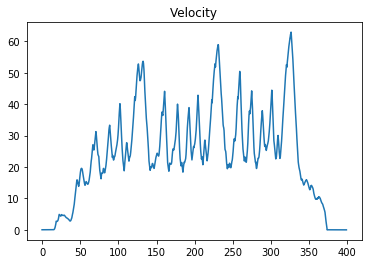

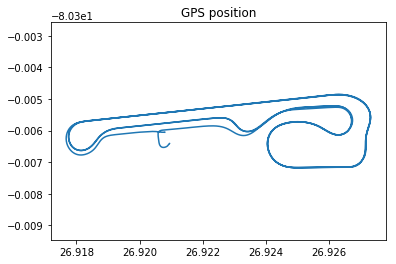

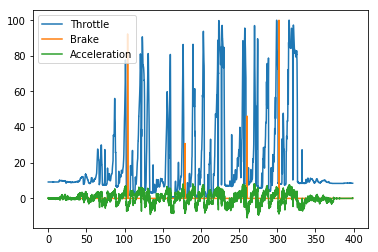

In [5]:
# Data Review 
plt.figure(1)
plt.plot(t,vx)
plt.title('Velocity')
plt.figure(2)
plt.plot(gps_lat,gps_lon)
plt.title("GPS position")
plt.axis('equal')
plt.figure(3)
plt.plot(t,tho_cmd)
plt.plot(t,brk_cmd)
plt.plot(t,ax)
plt.legend(['Throttle','Brake','Acceleration'])
plt.show()

In [6]:
np.savez('race_data_mit_223010103',t = t,s=s,swa_cmd=swa_cmd,tho_cmd = tho_cmd, brk_cmd = brk_cmd, gps_lat = gps_lat,
        gps_lon = gps_lon,vx = vx, vy = vy, ax = ax, ay =ay)